### 결정트리
+ 귀납추론을 위해 자주 사용되는 실용적인 방법이다.
+ 데이터들을 root에서부터 중간노드를 거쳐 leaf에 배정하는 기능을 수행한다.
+ 결정트리의 판정은 논리곱의 논리합으로 표현된다.  
#### => 여러가지 속성 중에서 어떤 것이 가장 중요할까?
+ 정보이득이 큰, 엔트로피가 높은, 속성! 
+ 지니불순도가 낮아지게 하는 속성!
+ sklearn의 결정트리는 지니불순도를 이용해 결정트리를 만드는 CART(Classification And Regression Tree) 알고리즘을 사용한다.
+ 비용함수 J(A, a)를 최소화하는 A, a를 찾기 위해 최적화를 수행하는 방식으로 연속적인 값에 대해서도 결정트리를 만들 수 있다.
+ 비용함수에서 사용하는 지니불순도를 간단하게 엔트로피로 변경할 수도 있어 유연하고 효율적이다.

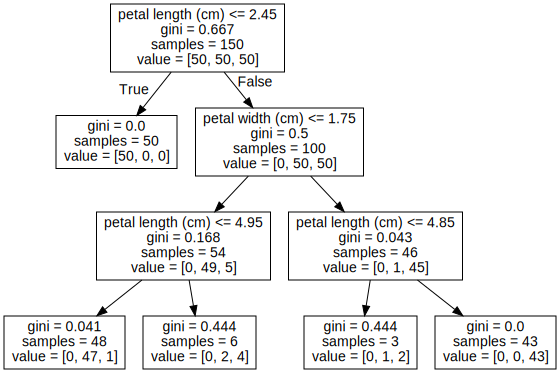

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

iris = load_iris()
X, y = iris.data, iris.target

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

graph = export_graphviz(model,
                        feature_names=iris.feature_names)
display(graphviz.Source(graph))

전체데이터를 사용했는데도 결정트리에 petal(꽃잎)의 길이, 너비만 사용된 것을 볼 수 있다.  
sepal(꽃받침) 데이터를 가지고 결정트리를 만들어보고, 왜 결정트리에 사용되지 않았을지 생각해보자.

In [4]:
iris = load_iris()
X, y = iris.data[:, :2], iris.target

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

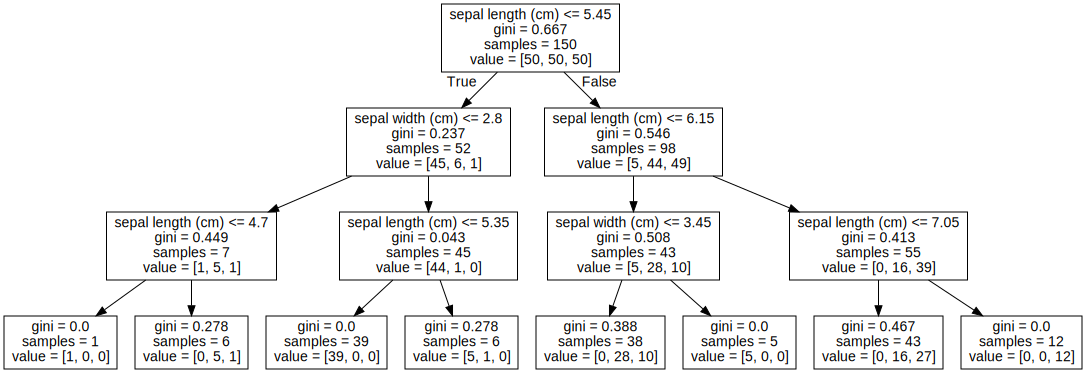

In [5]:
graph = export_graphviz(model,
                        feature_names=iris.feature_names[:2])
display(graphviz.Source(graph))

sepal 데이터만을 이용하여 결정트리를 만들었을 때 분할이 지나치게 많이 일어나며,  
각 노드의 지니불순도도 빠르게 감소하지 않는 것을 확인할 수 있다.  
따라서 전체 데이터를 사용해 결정트리를 만들었을 때 petal 데이터가 사용된 것으로 볼 수 있다.

#### 엔트로피를 이용해 결정트리 만들기
+ 엔트로피를 이용한 비용함수도 사용할 수 있다.
+ 엔트로피를 사용하고, 모든 속성을 다 썼을 때 어떤 결정트리가 생성되는지 확인해보자.  
=> criterion='entropy' 로 설정

In [7]:
iris = load_iris()
X, y = iris.data, iris.target

model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

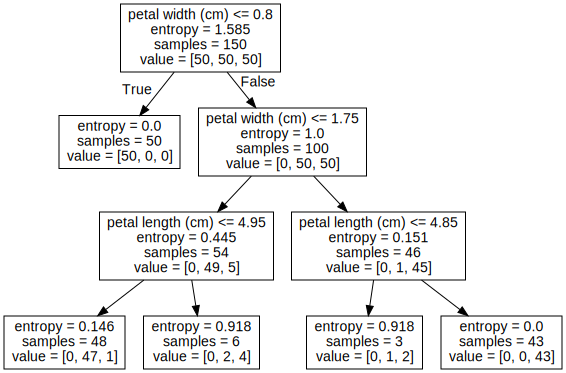

In [8]:
graph = export_graphviz(model,
                        feature_names=iris.feature_names)
display(graphviz.Source(graph))

각 노드에 gini 대신 entropy가 표시된 것을 볼 수 있다.  
leaf 노드들의 samples(레이블별 샘플 수)를 확인해보면 지니불순도로 만든 결정트리와 차이가 없다.  
#### 그렇다면 두 방법의 차이는?
+ 지니불순도는 엔트로피에 비해 좀 더 빠르게 계산할 수 있다.
+ 엔트로피를 사용한 결정트리가 비교적 균형잡힌 모양이 된다.